# Análisis de los resultados de un experimento de expresión diferencial usando Python

En esta práctica vamos a utilizar los resultados obtenidos en un experimento de expresión diferencial utilizando RNAseq.
Las muestras analizadas se corresponden con dos variedades de *Arabidopsis*: *Landsberg erecta* (Ler) y Mp. La diferencia entre ambas es el alelo del gen DELLA. DELLA es un activador transcripcional que participa en la regulación relacionada con la hormona gibelerina. En el experimento se han obtenido los valores de expresión para tres muestras Ler y tres Mp.

## Librerías utilizadas

Las librerías de Python que más vamos a utilizar son:

  - [Numpy](https://numpy.org/): la libería base de análisis de datos matriciales en Python
  - [Pandas](https://pandas.pydata.org/): una librería que proporciona la clase DataFrame
  - [Matplotlib](https://matplotlib.org/): la librería estándar de representación gráfica


## Ficheros de entrada

En la práctica vamos a utilizar dos ficheros de entrada:

  - fichero de cuentas creado por HTSeq (all.htseq-count.unstranded.tsv.TPMs.tsv)
  - resultado del análisis de expresión diferencial realizado por DESeq (Mp_vs_Ler.min1TPM.DESeq2.tsv')

Hemos de asegurarnos de que podemos leer los ficheros de entrada. Hemos de asegurarnos de que ponemos el nombre correcto del directorio en el que se encuentran los ficheros de entrada.

In [81]:
from pathlib import Path

dir_datos_practicas = Path('.')

path_hstseq_counts = dir_datos_practicas / 'all.htseq-count.unstranded.tsv.TPMs.tsv'
path_resultados_dseq =  dir_datos_practicas / 'Mp_vs_Ler.min1TPM.DESeq2.tsv'

print(f'El fichero de cuentas ({path_hstseq_counts}) existe:', path_hstseq_counts.exists())
print(f'El fichero de resultados DESeq ({path_resultados_dseq}) existe:', path_resultados_dseq.exists())

El fichero de cuentas (all.htseq-count.unstranded.tsv.TPMs.tsv) existe: True
El fichero de resultados DESeq (Mp_vs_Ler.min1TPM.DESeq2.tsv) existe: True


## Lectura del fichero de cuentas

Vamos a leer el fichero de cuentas utilizando la función [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) de pandas. pandas creará un [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) con los datos contenidos en el fichero. 

In [4]:
import pandas

counts = pandas.read_csv(path_hstseq_counts, sep='\t', header=0, index_col=0)


In [6]:
print(counts)

               Ler.1      Ler.2      Ler.3       Mp.1       Mp.2       Mp.3
AT1G01010   6.105733   6.058626   5.355947   5.787396   6.379099   7.321445
AT1G01020   8.824576  10.385616   8.282000  10.548819  10.213892  11.552513
AT1G01030   4.125783   3.345577   3.781244   4.824259   4.498889   5.097285
AT1G01040   9.167993   9.186799   8.561267  11.634027  11.181421  12.061252
AT1G01050  89.215493  92.971021  88.218091  80.590359  86.147477  78.299546
...              ...        ...        ...        ...        ...        ...
ATMG09730   0.926842   0.000000   0.000000   0.000000   0.000000   0.000000
ATMG09740   0.000000   1.029284   0.000000   0.000000   0.000000   0.000000
ATMG09950   0.000000   0.000000   0.980037   0.000000   0.976682   0.980841
ATMG09960   2.003982   0.000000   1.986561   0.000000   0.989880   0.000000
ATMG09980   1.001991   0.000000   0.000000   0.000000   0.989880   0.994096

[37336 rows x 6 columns]


In [13]:
counts.shape

(37336, 6)

In [14]:
counts.describe()

,Ler.1,Ler.2,Ler.3,Mp.1,Mp.2,Mp.3
count,37336.000000,37336.000000,37336.000000,37336.000000,37336.000000,37336.000000
mean,26.783801,26.783801,26.783801,26.783801,26.783801,26.783801
std,247.353417,245.103607,256.293707,253.361519,252.350847,247.417881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.348425,1.274892,1.183091,1.249550,1.272138,1.340639
75%,15.217248,14.926796,14.286435,14.950667,14.852266,15.407475
max,24163.431815,24050.460364,24953.256701,24115.206360,23252.906744,22683.422379


array([[<AxesSubplot:title={'center':'Ler.1'}>,
        <AxesSubplot:title={'center':'Ler.2'}>],
       [<AxesSubplot:title={'center':'Ler.3'}>,
        <AxesSubplot:title={'center':'Mp.1'}>],
       [<AxesSubplot:title={'center':'Mp.2'}>,
        <AxesSubplot:title={'center':'Mp.3'}>]], dtype=object)

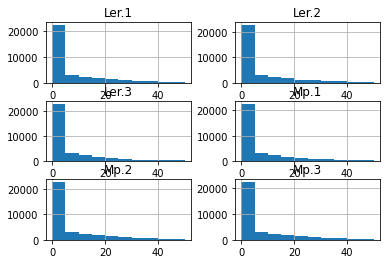

In [11]:
counts.hist(range=(0, 50))

array([[<AxesSubplot:title={'center':'Ler.1'}>,
        <AxesSubplot:title={'center':'Ler.2'}>],
       [<AxesSubplot:title={'center':'Ler.3'}>,
        <AxesSubplot:title={'center':'Mp.1'}>],
       [<AxesSubplot:title={'center':'Mp.2'}>,
        <AxesSubplot:title={'center':'Mp.3'}>]], dtype=object)

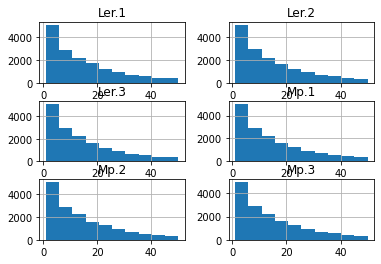

In [12]:
counts.hist(range=(1, 50))

<AxesSubplot:>

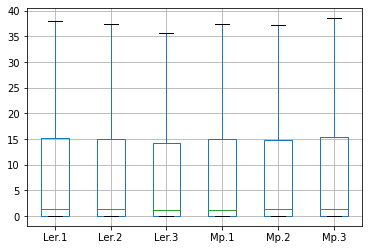

In [67]:
counts.boxplot(showfliers=False)

## MDS de las muestras

Utilizando el fichero de cuentas vamos a realizar un [Escalado Multidimensional](https://es.wikipedia.org/wiki/Escalamiento_multidimensional) (MDS). Para hacerlo utilizaremos la funcionalidad [MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) de la librería [scikit-learn](https://scikit-learn.org/)

In [15]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_result = mds.fit(counts.T)
transform = pandas.DataFrame(mds_result.embedding_, index=counts.columns)
print(transform)

                 0            1
Ler.1  2454.393303 -3713.935054
Ler.2   299.731306 -3180.346841
Ler.3 -2809.276274 -2063.596361
Mp.1  -1581.100221  2835.228600
Mp.2    296.235540  4478.668060
Mp.3   1340.016346  1643.981596


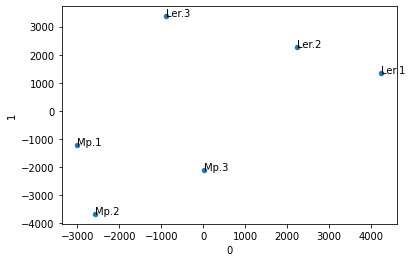

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots()

transform.plot.scatter(x=0, y=1, ax=axes)

for x, y in transform.iterrows():
    axes.annotate(x, y)

## Lectura del fichero de resultados DESeq

Las columnas del fichero son:

  - baseMean: media, teniendo en cuenta todas las muestras, normalizada de las cuentas
  - log2FoldChange: cambio de expresión entre las muestras expresado como el logaritmo en base de dos del ratio de expresión entre ambas muestras. 
  - lfcSE: Error estándar de la estima de log2FoldChange
  - pvalue (p-valor). probabilidad de que hayamos observado un cambio de expresión tan grande o mayor que el observado si asumimos que no hay diferencias entre las muestras.
  - padj: p-valor corregido teniendo en cuenta el número de comparaciones (una por cada gen) que hemos realizado.


In [19]:
dseq_result = pandas.read_csv(path_resultados_dseq, sep='\t', header=0, index_col=0)
print(dseq_result)

              baseMean  log2FoldChange     lfcSE       stat         pvalue  \
AT1G66970  1903.990432       -2.778947  0.079000 -35.176439  4.584400e-271   
AT5G16250  1199.264104        2.393990  0.091435  26.182496  4.205843e-151   
AT5G17490   527.798009        3.892149  0.171069  22.751862  1.375370e-114   
AT5G51810   390.557933       -3.512193  0.159985 -21.953266  8.059781e-107   
AT5G17890   597.484532        7.780376  0.373587  20.826115   2.510139e-96   
...                ...             ...       ...        ...            ...   
AT4G22580   191.052806        0.000035  0.148691   0.000237   9.998110e-01   
AT4G25990   278.167376        0.000049  0.150025   0.000327   9.997393e-01   
AT4G26550   178.568588        0.000009  0.156359   0.000061   9.999517e-01   
AT5G41810   501.811336       -0.000017  0.113316  -0.000152   9.998789e-01   
AT5G48990   164.422684       -0.000028  0.171082  -0.000166   9.998675e-01   

                    padj  
AT1G66970  8.721363e-267  
AT5G16250

## MA plot

Representa el cambio en la expresión frente a la expresión para cada gen. En esta representación es habitual encontrar más varianza den la expresión de los genes menos expresados.

In [48]:
import numpy
mascara_genes_expresados_diferencialmente = dseq_result['padj'] < 0.05
mascara_genes_no_expresados_diferencialmente = numpy.logical_not(mascara_genes_expresados_diferencialmente)
num_genes_expresados_diferencialmente = sum(mascara_genes_expresados_diferencialmente)
print(num_genes_expresados_diferencialmente)

3223


(0.0, 10000.0)

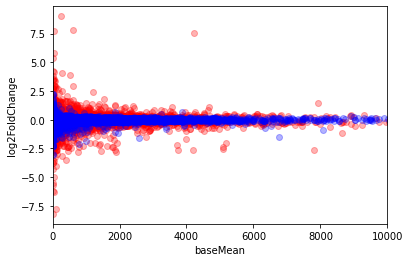

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots()
xs = range(0,100)
mascara = mascara_genes_expresados_diferencialmente
axes.scatter(dseq_result['baseMean'][mascara], dseq_result['log2FoldChange'][mascara], color='red', alpha=0.3)
mascara = mascara_genes_no_expresados_diferencialmente
axes.scatter(dseq_result['baseMean'][mascara], dseq_result['log2FoldChange'][mascara], color='blue', alpha=0.3)
axes.set_ylabel('log2FoldChange')
axes.set_xlabel('baseMean')
axes.set_xlim(0,10000)

## Lista de genes con mayores diferencias

In [61]:
mascara = numpy.logical_and(dseq_result['log2FoldChange'] > 5, dseq_result['padj'] < 0.05)
genes_muy_sobre_expresados = dseq_result.loc[mascara, :]
print(genes_muy_sobre_expresados)

              baseMean  log2FoldChange     lfcSE       stat        pvalue  \
AT5G17890   597.484532        7.780376  0.373587  20.826115  2.510139e-96   
AT1G67105  4216.751413        7.528596  0.598073  12.588091  2.455412e-36   
AT5G17880   261.255523        9.005502  0.842076  10.694401  1.081164e-26   
AT1G64795    56.690691        5.778813  0.636893   9.073442  1.153151e-19   
AT5G18255    37.655540        7.688295  1.213675   6.334723  2.377678e-10   
AT5G02885     3.928969        5.395834  1.488812   3.624256  2.897948e-04   

                   padj  
AT5G17890  9.550576e-93  
AT1G67105  1.557059e-33  
AT5G17880  3.546219e-24  
AT1G64795  2.050238e-17  
AT5G18255  1.409126e-08  
AT5G02885  3.365725e-03  


In [62]:
mascara = numpy.logical_and(dseq_result['log2FoldChange'] < 5, dseq_result['padj'] < 0.05)
genes_muy_reprimidos = dseq_result.loc[mascara, :]
print(genes_muy_reprimidos)

              baseMean  log2FoldChange     lfcSE       stat         pvalue  \
AT1G66970  1903.990432       -2.778947  0.079000 -35.176439  4.584400e-271   
AT5G16250  1199.264104        2.393990  0.091435  26.182496  4.205843e-151   
AT5G17490   527.798009        3.892149  0.171069  22.751862  1.375370e-114   
AT5G51810   390.557933       -3.512193  0.159985 -21.953266  8.059781e-107   
AT4G16215   277.799404        4.041825  0.196035  20.617824   1.899091e-94   
...                ...             ...       ...        ...            ...   
AT2G14680   292.884620        0.331261  0.125700   2.635335   8.405424e-03   
AT5G49910  7505.394679        0.178577  0.067767   2.635156   8.409875e-03   
AT2G15390   285.331830       -0.537247  0.203966  -2.633994   8.438693e-03   
AT1G32928   116.154547       -0.533369  0.202524  -2.633611   8.448214e-03   
AT3G04030   126.130177        0.485551  0.184411   2.632980   8.463937e-03   

                    padj  
AT1G66970  8.721363e-267  
AT5G16250

## Volcano plot

Text(0, 0.5, '-log(p value)')

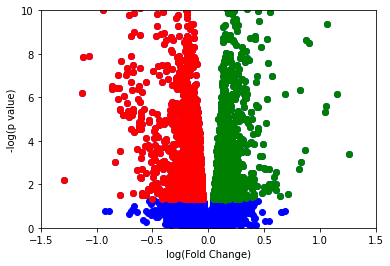

In [77]:
import numpy

dseq_result = pandas.read_csv(path_resultados_dseq, sep='\t', header=0, index_col=0)
log2_fold_change = dseq_result['log2FoldChange']
log_fold_change = numpy.log10(numpy.exp2(log2_fold_change))

p_val = dseq_result['padj']
log_p_val = numpy.log10(p_val)

mask_significant = p_val < 0.05

mask_up = log_fold_change > 0
mask_down = log_fold_change < 0

mask_significant_and_up = numpy.logical_and(mask_significant, mask_up)
mask_significant_and_down = numpy.logical_and(mask_significant, mask_down)

fig, axes = plt.subplots()

axes.scatter(log_fold_change, -log_p_val, color='blue')
axes.scatter(log_fold_change[mask_significant_and_down], -log_p_val[mask_significant_and_down], color='red')
axes.scatter(log_fold_change[mask_significant_and_up], -log_p_val[mask_significant_and_up], color='green')


axes.set_ylim(0, 10)
axes.set_xlim(-1.5, 1.5)
axes.set_xlabel('log(Fold Change)')
axes.set_ylabel('-log(p value)')


## Comparación de expresión entre muestras utilizando scatter plots

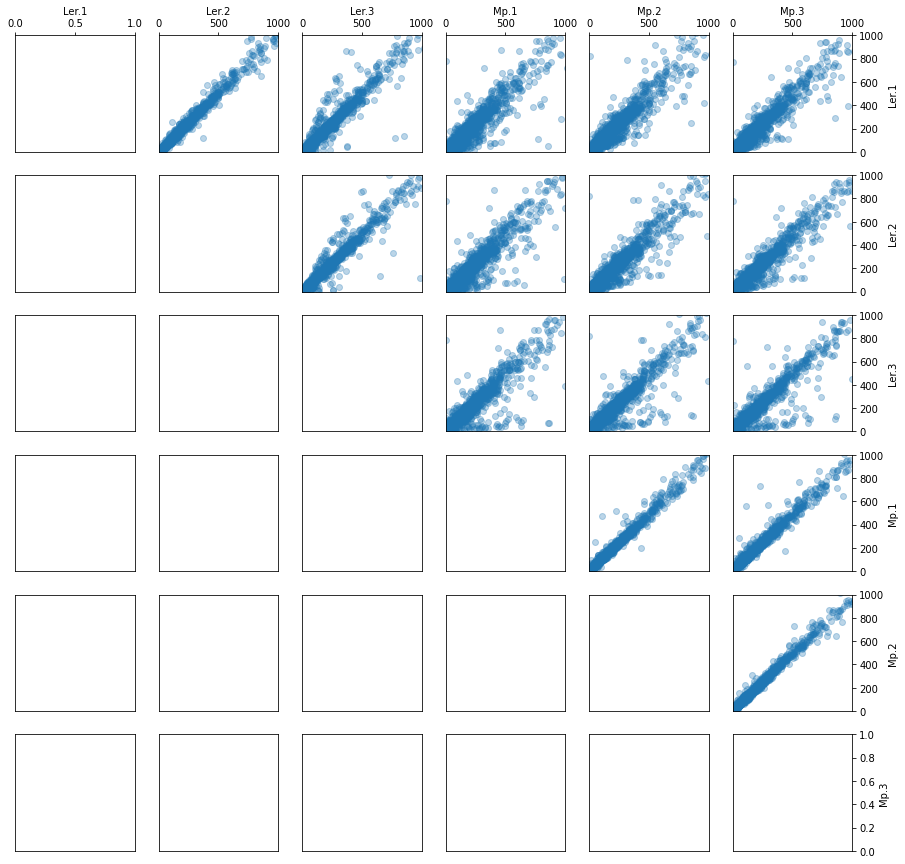

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

range_ = (0, 1000)

samples = list(counts.columns)
n_samples = len(samples)

fig, axess = plt.subplots(n_samples, n_samples, figsize=(15, 15))

for col_idx in range(0, n_samples):
    for row_idx in range(0, col_idx):
        col_sample = samples[col_idx]
        row_sample = samples[row_idx]
        axes = axess[row_idx, col_idx]
        axes.scatter(counts[row_sample], counts[col_sample], alpha=0.3)
        axes.set_xlim(range_)
        axes.set_ylim(range_)

for row_axess in axess:
    for axes in row_axess:
        axes.xaxis.set_visible(False)
        axes.yaxis.set_visible(False)
        
for row_idx, sample in enumerate(samples):
    axes = axess[row_idx, n_samples - 1]
    axes.yaxis.set_visible(True)
    axes.yaxis.tick_right()
    axes.set_ylabel(sample)
    axes.yaxis.set_label_position("right")

for col_idx, sample in enumerate(samples):
    axes = axess[0, col_idx]
    axes.xaxis.set_visible(True)
    axes.xaxis.tick_top()
    axes.set_xlabel(sample)
    axes.xaxis.set_label_position("top")
